In [1]:
import jax

import jax.numpy as np
import jax.scipy as sp

from numpy.polynomial.hermite import hermgauss
import scipy as osp

from vb_lib import structure_model_lib, data_utils, cavi_lib, fast_structure_lib, plotting_utils

import paragami

from copy import deepcopy

import time

import matplotlib.pyplot as plt
%matplotlib inline  

from bnpmodeling_runjingdev import cluster_quantities_lib, modeling_lib


/accounts/grad/runjing_liu/.conda/envs/bnp_sensitivity_jax/lib/python3.8/site-packages/jax/lib/xla_bridge.py:130: UserWarning: No GPU/TPU found, falling back to CPU.
  warnings.warn('No GPU/TPU found, falling back to CPU.')


In [2]:
import numpy as onp
onp.random.seed(53453)

# Load data

In [3]:
data_file = '../../../../fastStructure/test/testdata.npz'
data = np.load(data_file)
g_obs = np.array(data['g_obs'])

g_obs = np.array(data['g_obs'])
g_obs_raw = np.array(data['g_obs_raw'])

# just checking ... 
which_missing = (g_obs_raw == 3)
(g_obs.argmax(-1) == g_obs_raw)[~which_missing].all()
(g_obs[which_missing] == 0).all()

DeviceArray(True, dtype=bool)

In [4]:
n_obs = g_obs.shape[0]
n_loci = g_obs.shape[1]

# Load fastStructure fit

In [5]:
filename = '../../../../fastStructure/fits/test/testoutput_simple.3'

In [6]:
vb_params_dict, vb_params_paragami = fast_structure_lib.load_fs_to_vb_params(filename)
print(vb_params_paragami)

OrderedDict:
	[pop_freq_beta_params] = NumericArrayPattern (500, 3, 2) (lb=0.0, ub=inf)
	[ind_admix_params] = OrderedDict:
	[stick_beta] = NumericArrayPattern (200, 2, 2) (lb=0.0, ub=inf)


In [7]:
e_ind_admix, e_pop_freq = plotting_utils.get_vb_expectations(vb_params_dict)

### Check against fast-structure saved means

In [19]:
e_ind_admix_fs, _, e_pop_freq_fs, _ = \
    fast_structure_lib.load_fs_means_vars(filename)

In [20]:
np.abs(e_pop_freq - e_pop_freq_fs).max()

DeviceArray(5.01246185e-07, dtype=float64)

In [21]:
np.abs(e_ind_admix - e_ind_admix_fs).max()

DeviceArray(4.99500499e-07, dtype=float64)

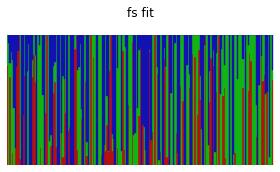

In [11]:
plotting_utils.plot_admixture(e_ind_admix, 'fs fit')

# Check against my fit

In [12]:
prior_params_dict, prior_params_paragami = structure_model_lib.get_default_prior_params()

In [13]:
prior_params_dict['dp_prior_alpha'] = 1.0

In [14]:
vb_opt_dict, vb_opt, _, _  = \
    cavi_lib.run_cavi(g_obs, vb_params_dict,
                vb_params_paragami,
                prior_params_dict, 
                print_every = 20)

Compiling cavi functions ...
CAVI compile time: 3.41sec

 running CAVI ...
iteration [20]; kl:98210.808711; elapsed: 1.1099secs
iteration [40]; kl:98145.083006; elapsed: 1.1407secs
iteration [60]; kl:98110.784927; elapsed: 1.0618secs
iteration [80]; kl:98089.034898; elapsed: 1.0623secs
iteration [100]; kl:98074.175786; elapsed: 1.0732secs
iteration [120]; kl:98063.689724; elapsed: 1.0685secs
iteration [140]; kl:98056.171272; elapsed: 1.0748secs
iteration [160]; kl:98050.726898; elapsed: 1.0662secs
iteration [180]; kl:98046.749958; elapsed: 1.072secs
iteration [200]; kl:98043.817031; elapsed: 1.0631secs
iteration [220]; kl:98041.62982; elapsed: 1.0653secs
iteration [240]; kl:98039.977647; elapsed: 1.0703secs
iteration [260]; kl:98038.71158; elapsed: 1.0644secs
iteration [280]; kl:98037.726253; elapsed: 1.0662secs
iteration [300]; kl:98036.947072; elapsed: 1.0715secs
iteration [320]; kl:98036.321212; elapsed: 1.0716secs
iteration [340]; kl:98035.811245; elapsed: 1.0669secs
iteration [360

In [15]:
e_ind_admix_bnp, e_pop_freq_bnp = plotting_utils.get_vb_expectations(vb_params_dict)

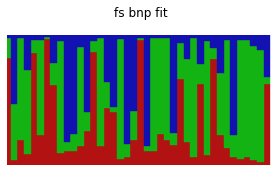

In [25]:
plotting_utils.plot_admixture(e_ind_admix_bnp[0::5], 'fs bnp fit')

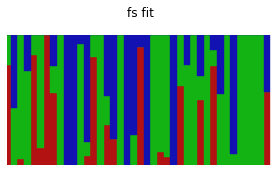

In [26]:
plotting_utils.plot_admixture(e_ind_admix_fs[0::5], 'fs fit')